#### Importing Necessary Libraries

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
boston = pd.read_csv("assignment4-dataset.csv")

In [142]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### Removing Missing Values

In [143]:
boston.replace("?", np.nan, inplace=True)
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [144]:
count_CRIM = boston["CRIM"].value_counts()
count_ZN = boston["ZN"].value_counts()
count_INDUS = boston["INDUS"].value_counts()
count_CHAS = boston["CHAS"].value_counts()
count_AGE = boston["AGE"].value_counts()
count_LSTAT = boston["LSTAT"].value_counts()

In [145]:
boston["CRIM"].replace(np.NaN, count_CRIM.index[0], inplace=True)
boston["ZN"].replace(np.NaN, count_ZN.index[0], inplace=True)
boston["INDUS"].replace(np.NaN, count_INDUS.index[0], inplace=True)
boston["CHAS"].replace(np.NaN, count_CHAS.index[0], inplace=True)
boston["AGE"].replace(np.NaN, count_AGE.index[0], inplace=True)
boston["LSTAT"].replace(np.NaN, count_LSTAT.index[0], inplace=True)

C:\Users\aakas\AppData\Local\Temp\ipykernel_16324\973233367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston["CRIM"].replace(np.NaN, count_CRIM.index[0], inplace=True)
C:\Users\aakas\AppData\Local\Temp\ipykernel_16324\973233367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [146]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

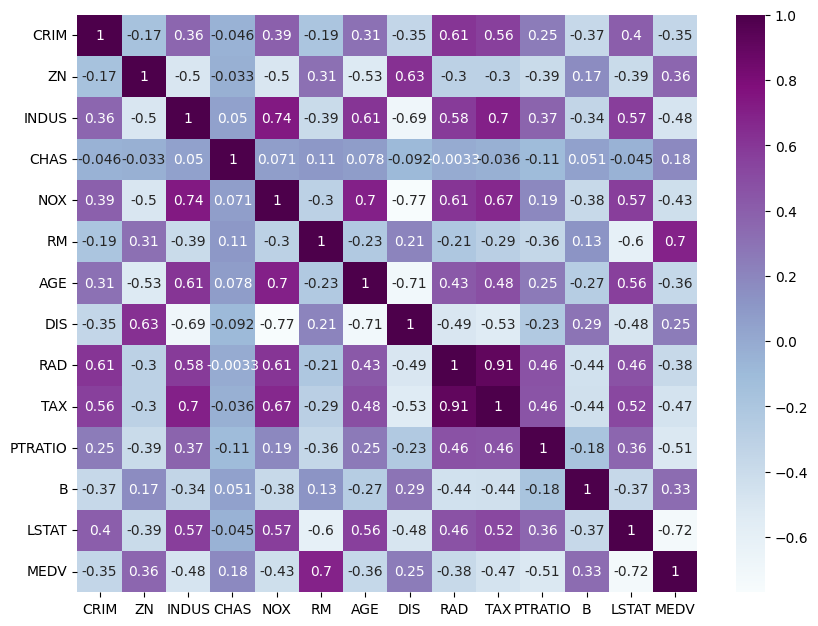

In [147]:
correlation = boston.corr()
plt.figure(figsize=(10, 7.5))

sns.heatmap(correlation, annot=True, cmap="BuPu")

#### Linear Regression using Sklearn

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score

In [149]:
x = boston.drop(columns=["MEDV"])
y = boston["MEDV"]

In [150]:
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.28, random_state=1)

In [151]:
model = LinearRegression()

In [152]:
model.fit(x_train, y_train)

LinearRegression()

In [153]:
y_pred = model.predict(x_test)

#### Find MSE and R2 Score

In [154]:
mse = mean_squared_error(y_test, y_pred)
mse

21.381490061054482

In [155]:
r2_score(y_test,y_pred)


0.7775071683553145

#### Plotting Regressiong Line using Seaborn

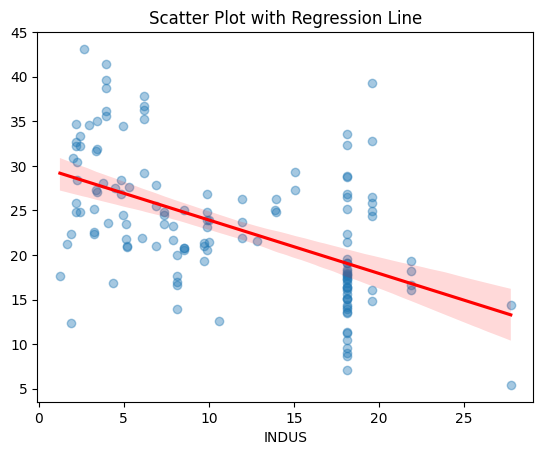

In [156]:
sns.regplot(data = boston, x=x_test["INDUS"], y=y_pred, scatter_kws={"alpha":0.4}, line_kws={"color":"red"})

plt.title("Scatter Plot with Regression Line")
plt.show()